This file contains:
- Initial pre-processing of the **penguins_train.csv** data taking into consideration the data cleaning (imputation), data skew handling (mean or median for data imputation), handling categorical values and continuous values (by encoding and normalization). <br />
<br />
- Evaluating the OvO and OvA SVM model on Test Set (splitting **penguins_train.csv** to train and test) to come up with best parameters that will later be used for making predictions on **penguins_test.csv** (another file).<br />
<br />
- Initial pre-processing of the **penguins_test.csv**. We employ the same procedure as described for the *penguins_train.csv* above.<br />


### **1. Importing Libraries**

In [1]:
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev
from itertools import combinations
from sklearn.svm import SVC
import pickle
#--------------------~-----------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [2]:
# Import training data into pandas dataframe
train_csv = pd.read_csv('./penguins_train.csv')
print('Shape of the dataset:', train_csv.shape)
train_csv.head(3)

Shape of the dataset: (274, 10)


,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,38.8,17.2,180.0,3800.0,MALE,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,41.1,18.6,189.0,3325.0,MALE,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,39.0,17.5,186.0,3550.0,FEMALE,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)


### **2. Data Preprocessing**
- Here we try to understand our data and preprocess it to the desirable format.
- All the observations are written in bullet points in markdown.

In [3]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               274 non-null    object 
 1   Clutch Completion    274 non-null    object 
 2   Culmen Length (mm)   272 non-null    float64
 3   Culmen Depth (mm)    272 non-null    float64
 4   Flipper Length (mm)  272 non-null    float64
 5   Body Mass (g)        272 non-null    float64
 6   Sex                  267 non-null    object 
 7   Delta 15 N (o/oo)    262 non-null    float64
 8   Delta 13 C (o/oo)    263 non-null    float64
 9   Species              274 non-null    object 
dtypes: float64(6), object(4)
memory usage: 21.5+ KB


- From above we can observe that there are missing values in the attributes: <br/> 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'.

In [4]:
# Visualize the rows that have missing values
train_csv[train_csv.isnull().any(axis=1)]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
7,Dream,Yes,40.8,18.4,195.0,3900.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
26,Torgersen,Yes,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,Adelie Penguin (Pygoscelis adeliae)
51,Dream,Yes,51.9,19.5,206.0,3950.0,MALE,NaN,-23.78767,Chinstrap penguin (Pygoscelis antarctica)
62,Torgersen,Yes,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
97,Biscoe,Yes,47.3,15.3,222.0,5250.0,MALE,NaN,NaN,Gentoo penguin (Pygoscelis papua)
169,Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
170,Torgersen,Yes,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
197,Torgersen,Yes,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
206,Biscoe,Yes,46.2,14.4,214.0,4650.0,NaN,8.24253,-26.81540,Gentoo penguin (Pygoscelis papua)


- So, in total we have 15 rows out of 274 where missing data exists. This makes 5% of the entire data.

----

- Let's analyze number of unique values in each of the categorical columns

In [5]:
print(train_csv["Island"].value_counts())
print("----------------------------------")
print(train_csv["Clutch Completion"].value_counts())
print("----------------------------------")
print(train_csv["Species"].value_counts())
print("----------------------------------")
print(train_csv["Sex"].value_counts())
print("----------------------------------")

Island
Biscoe       132
Dream        102
Torgersen     40
Name: count, dtype: int64
----------------------------------
Clutch Completion
Yes    245
No      29
Name: count, dtype: int64
----------------------------------
Species
Adelie Penguin (Pygoscelis adeliae)          121
Gentoo penguin (Pygoscelis papua)             95
Chinstrap penguin (Pygoscelis antarctica)     58
Name: count, dtype: int64
----------------------------------
Sex
MALE      135
FEMALE    131
.           1
Name: count, dtype: int64
----------------------------------


In [6]:
# Display the row where there is an anomolous value `.` in 'Sex' column.
results = train_csv.loc[train_csv["Sex"] == '.']
results

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
219,Biscoe,Yes,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,Gentoo penguin (Pygoscelis papua)


In [7]:
# Insert the Null (NaN) value in place of '.' value
train_csv.at[219,'Sex']=np.nan

In [8]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               274 non-null    object 
 1   Clutch Completion    274 non-null    object 
 2   Culmen Length (mm)   272 non-null    float64
 3   Culmen Depth (mm)    272 non-null    float64
 4   Flipper Length (mm)  272 non-null    float64
 5   Body Mass (g)        272 non-null    float64
 6   Sex                  266 non-null    object 
 7   Delta 15 N (o/oo)    262 non-null    float64
 8   Delta 13 C (o/oo)    263 non-null    float64
 9   Species              274 non-null    object 
dtypes: float64(6), object(4)
memory usage: 21.5+ KB


----

- To fill in the missing values, we may consider an imputation technique.
- Let's normalize the data (continuous attributes) before considering any imputation techniques.
- We are choosing z-score normalization to retain the outlier information.

In [9]:
train_csv["Culmen Length (mm)"] = (train_csv["Culmen Length (mm)"] - train_csv["Culmen Length (mm)"].mean())/train_csv["Culmen Length (mm)"].std()
train_csv["Culmen Depth (mm)"] = (train_csv["Culmen Depth (mm)"] - train_csv["Culmen Depth (mm)"].mean())/train_csv["Culmen Depth (mm)"].std()
train_csv["Flipper Length (mm)"] = (train_csv["Flipper Length (mm)"] - train_csv["Flipper Length (mm)"].mean())/train_csv["Flipper Length (mm)"].std()
train_csv["Body Mass (g)"] = (train_csv["Body Mass (g)"] - train_csv["Body Mass (g)"].mean())/train_csv["Body Mass (g)"].std()
train_csv["Delta 15 N (o/oo)"] = (train_csv["Delta 15 N (o/oo)"] - train_csv["Delta 15 N (o/oo)"].mean())/train_csv["Delta 15 N (o/oo)"].std()
train_csv["Delta 13 C (o/oo)"] = (train_csv["Delta 13 C (o/oo)"] - train_csv["Delta 13 C (o/oo)"].mean())/train_csv["Delta 13 C (o/oo)"].std()

In [10]:
# After Normalization, our continuous values look like this
train_csv.head(3)

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,-0.939709,0.008650,-1.479594,-0.477481,MALE,1.581213,0.457687,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,-0.524978,0.724744,-0.837160,-1.069378,MALE,1.018050,-0.534716,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,-0.903646,0.162099,-1.051305,-0.789006,FEMALE,-0.316707,-0.500027,Adelie Penguin (Pygoscelis adeliae)


----

- Let's analyze the continuous valued attribute `Culmen Length (mm)`

In [11]:
# Display the rows where the attribulte `Culmen Length` is NaN
train_csv[train_csv['Culmen Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


In [12]:
train_csv["Culmen Length (mm)"].describe()

count    2.720000e+02
mean    -6.791953e-16
std      1.000000e+00
min     -2.147840e+00
25%     -8.134865e-01
50%      7.908804e-02
75%      8.499478e-01
max      2.810907e+00
Name: Culmen Length (mm), dtype: float64

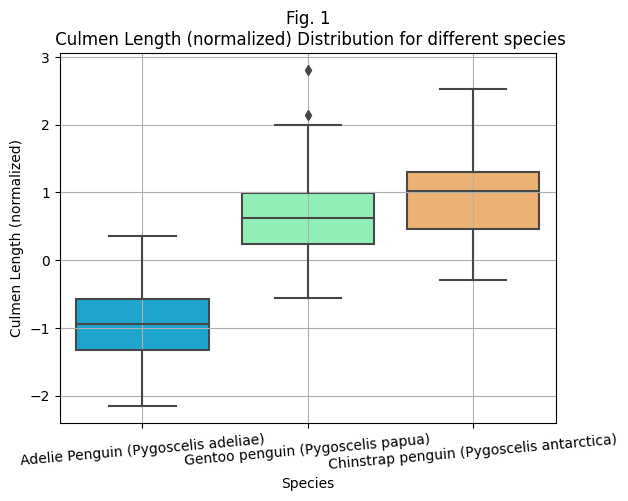

In [13]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                           # Creating a custom figure size
sns.boxplot(x='Species', y='Culmen Length (mm)', palette='rainbow', data=train_csv)             # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                                    # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Culmen Length (normalized)')                                                 # Labelling y-axis with a custom label
plt.title(label='Fig. 1\n Culmen Length (normalized) Distribution for different species')       # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve that, for the class `Adelie Penguine`, the `Culmen Length` data distribution is almost symmentric. Therefore, to fill the corresponding `NaN` value at index 248, we will use the mean of the values having the same class.
- From the box-plot, we oberve that, for the class `Gentoo Penguine`, the `Culmen Length` data distribution has got outliers. Therefore, to fill the corresponding `NaN` value at index 169, we will use the median of the values having the same class.

In [14]:
df_species_adelie = train_csv.loc[train_csv["Species"] == 'Adelie Penguin (Pygoscelis adeliae)']
df_species_gentoo = train_csv.loc[train_csv["Species"] == 'Gentoo penguin (Pygoscelis papua)']

In [15]:
train_csv.at[248,'Culmen Length (mm)'] = df_species_adelie["Culmen Length (mm)"].mean()
train_csv.at[169,'Culmen Length (mm)'] = df_species_gentoo["Culmen Length (mm)"].median()

In [16]:
train_csv[train_csv['Culmen Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have filled the missing values of `Culmen Length (mm)` attribute

----

- Let's analyze the continuous valued attribute `Culmen Depth (mm)`

In [17]:
# Display the rows where the attribulte `Culmen Depth` is NaN
train_csv[train_csv['Culmen Depth (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,0.620042,NaN,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,NaN,NaN,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


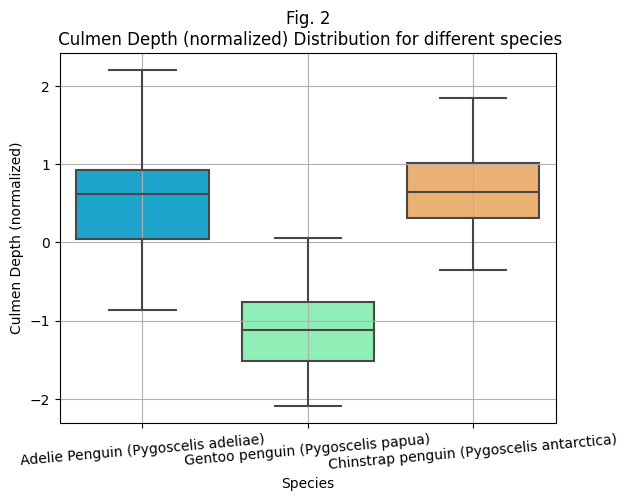

In [18]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                          
sns.boxplot(x='Species', y='Culmen Depth (mm)', palette='rainbow', data=train_csv) 
plt.xlabel(xlabel='Species')                                                          
plt.xticks(rotation=5)
plt.ylabel(ylabel='Culmen Depth (normalized)')                                               
plt.title(label='Fig. 2\n Culmen Depth (normalized) Distribution for different species')    
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve that, for the class `Adelie Penguine`, the `Culmen Depth` data distribution is **slightly skewed**. Therefore, to fill the corresponding `NaN` value at index 248, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Culmen Depth` data distribution is almost **symmentric**. Therefore, to fill the corresponding `NaN` value at index 169, we will use the **mean** of the values having the same class.  

In [19]:
train_csv.at[248,'Culmen Depth (mm)'] = df_species_adelie["Culmen Depth (mm)"].median()
train_csv.at[169,'Culmen Depth (mm)'] = df_species_gentoo["Culmen Depth (mm)"].mean()


In [20]:
train_csv[train_csv['Culmen Depth (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have successfully filled the missing values of `Culmen Depth (mm)` attribute

----

- Let's analyze the continuous valued attribute `Flipper Length (mm)`

In [21]:
# Display the rows where the attribulte `Flipper Length` is NaN
train_csv[train_csv['Flipper Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,0.620042,-1.121538,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,0.622445,NaN,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


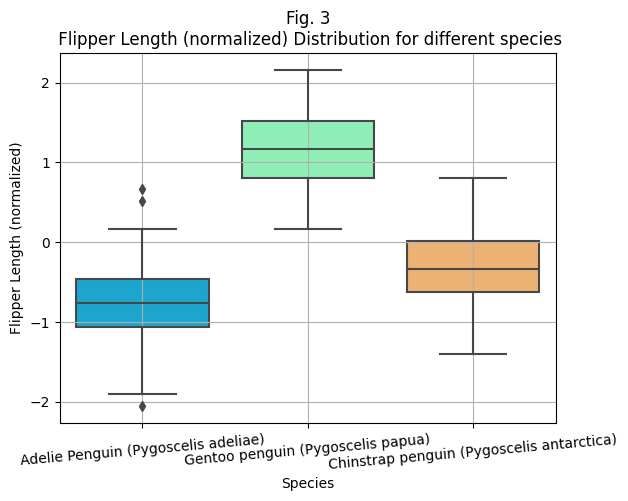

In [22]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                           # Creating a custom figure size
sns.boxplot(x='Species', y='Flipper Length (mm)', palette='rainbow', data=train_csv)            # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                                    # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Flipper Length (normalized)')                                                # Labelling y-axis with a custom label
plt.title(label='Fig. 3\n Flipper Length (normalized) Distribution for different species')      # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve a striking difference in the distribution of 'Flipper Length' for the classes 'Adelie Penguine' and 'Gentoo penguin'.
- For the class `Adelie Penguine`, the `Flipper Length` data distribution is almost symmetric even with outliers. Therefore, to fill the corresponding `NaN` value at index 248, we will use the **mean** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Flipper Length` data distribution is symmetric. Therefore, to fill the corresponding `NaN` value at index 169, we will use the **mean** of the values having the same class.  

In [23]:
train_csv.at[248,'Flipper Length (mm)'] = df_species_adelie["Flipper Length (mm)"].mean()
train_csv.at[169,'Flipper Length (mm)'] = df_species_gentoo["Flipper Length (mm)"].mean()

In [24]:
train_csv[train_csv['Flipper Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have filled the missing values of `Flipper Length (mm)` attribute

----

- Let's analyze the continuous valued attribute `Body Mass (g)`

In [25]:
train_csv[train_csv['Body Mass (g)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,0.620042,-1.121538,1.185826,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,0.622445,-0.774701,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


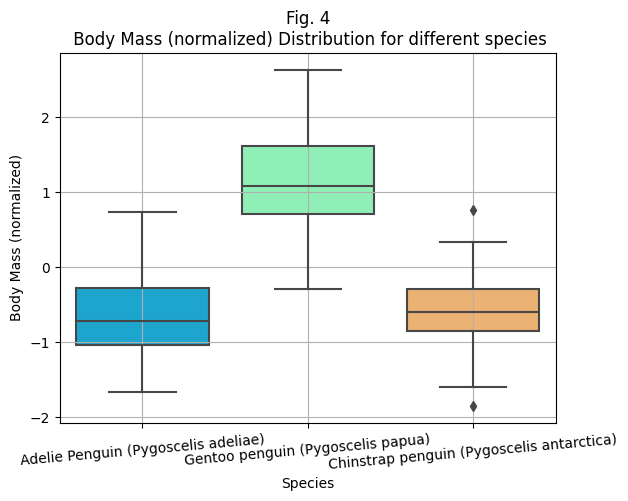

In [26]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                 # Creating a custom figure size
sns.boxplot(x='Species', y='Body Mass (g)', palette='rainbow', data=train_csv)        # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                          # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Body Mass (normalized)')                                           # Labelling y-axis with a custom label
plt.title(label='Fig. 4\n Body Mass (normalized) Distribution for different species') # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve a striking difference in the distribution of 'Body Mass' for the classes 'Adelie Penguine' and 'Gentoo penguin'.
- For the class `Adelie Penguine`, the `Body Mass` data distribution is slightly skewed. Therefore, to fill the corresponding `NaN` value at index 248, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Body Mass` data distribution is slightly skewed. Therefore, to fill the corresponding `NaN` value at index 169, we will use the **median** of the values having the same class.  

In [27]:
train_csv.at[248,'Body Mass (g)'] = df_species_adelie["Body Mass (g)"].median()
train_csv.at[169,'Body Mass (g)'] = df_species_gentoo["Body Mass (g)"].median()

In [28]:
train_csv[train_csv['Body Mass (g)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have successfully filled the missing values of `Body Mass (g)` attribute

----

- Let's analyze the continuous valued attribute `Delta 15 N (o/oo)`

In [29]:
train_csv[train_csv['Delta 15 N (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
7,Dream,Yes,-0.579073,0.622445,-0.408870,-0.352871,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
51,Dream,Yes,1.422458,1.185091,0.376328,-0.290566,MALE,NaN,2.32884,Chinstrap penguin (Pygoscelis antarctica)
62,Torgersen,Yes,-1.336409,0.315548,-1.122686,-0.602091,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,-1.120027,0.059800,-1.479594,-0.602091,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
97,Biscoe,Yes,0.592995,-0.963192,1.518434,1.329364,MALE,NaN,NaN,Gentoo penguin (Pygoscelis papua)
169,Biscoe,No,0.620042,-1.121538,1.185826,1.080144,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
170,Torgersen,Yes,-0.975773,2.054633,-0.694396,-0.477481,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
197,Torgersen,Yes,-1.787204,0.468996,-0.551633,-0.882463,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
207,Dream,No,-0.759391,0.980492,-1.194068,0.581704,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
218,Torgersen,Yes,-0.524978,0.213249,-1.336831,-1.225141,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


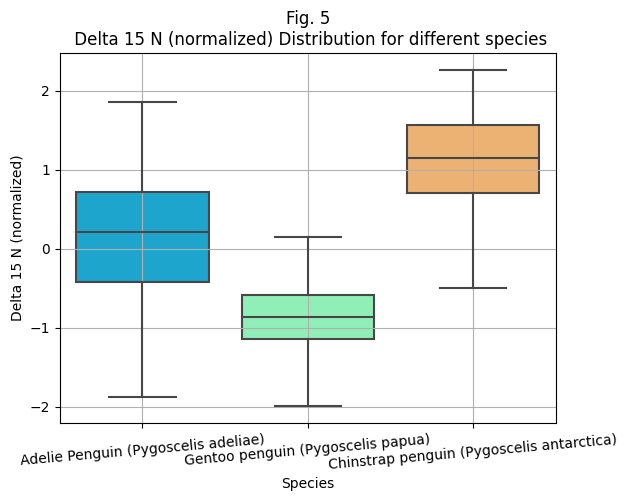

In [30]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                 # Creating a custom figure size
sns.boxplot(x='Species', y='Delta 15 N (o/oo)', palette='rainbow', data=train_csv)        # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                          # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Delta 15 N (normalized)')                                           # Labelling y-axis with a custom label
plt.title(label='Fig. 5\n Delta 15 N (normalized) Distribution for different species') # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- For the class `Adelie Penguine`, the `Delta 15 N (o/oo)` data distribution is slightly skewed. Therefore, to fill the corresponding `NaN`, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Delta 15 N (o/oo)` data distribution is almost symmentrical. Therefore, to fill the corresponding `NaN`, we will use the **mean** of the values having the same class.  
- And, for the class `Chinstrap penguin`, the `Delta 15 N (o/oo)` data distribution is almost symmentrical. Therefore, to fill the corresponding `NaN` value, we will use the **mean** of the values having the same class.  

In [31]:
df_species_chinstrap = train_csv.loc[train_csv["Species"] == 'Chinstrap penguin (Pygoscelis antarctica)']

value_adelie = df_species_adelie["Delta 15 N (o/oo)"].median()
value_gentoo = df_species_gentoo["Delta 15 N (o/oo)"].mean()
value_chinstrap = df_species_chinstrap["Delta 15 N (o/oo)"].mean()

In [32]:
train_csv.loc[(train_csv["Delta 15 N (o/oo)"].isnull()) & (train_csv["Species"] == 'Adelie Penguin (Pygoscelis adeliae)'), ['Delta 15 N (o/oo)']] = value_adelie
train_csv.loc[(train_csv["Delta 15 N (o/oo)"].isnull()) & (train_csv["Species"] == 'Gentoo penguin (Pygoscelis papua)'), ['Delta 15 N (o/oo)']] = value_gentoo
train_csv.loc[(train_csv["Delta 15 N (o/oo)"].isnull()) & (train_csv["Species"] == 'Chinstrap penguin (Pygoscelis antarctica)'), ['Delta 15 N (o/oo)']] = value_chinstrap

In [33]:
train_csv[train_csv['Delta 15 N (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have successfully filled the missing values of `Delta 15 N (o/oo)` attribute

----

- Let's analyze the continuous valued attribute `Delta 13 C (o/oo)`

In [34]:
train_csv[train_csv['Delta 13 C (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
7,Dream,Yes,-0.579073,0.622445,-0.408870,-0.352871,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
62,Torgersen,Yes,-1.336409,0.315548,-1.122686,-0.602091,FEMALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,-1.120027,0.059800,-1.479594,-0.602091,NaN,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
97,Biscoe,Yes,0.592995,-0.963192,1.518434,1.329364,MALE,-0.882649,NaN,Gentoo penguin (Pygoscelis papua)
169,Biscoe,No,0.620042,-1.121538,1.185826,1.080144,NaN,-0.882649,NaN,Gentoo penguin (Pygoscelis papua)
170,Torgersen,Yes,-0.975773,2.054633,-0.694396,-0.477481,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
197,Torgersen,Yes,-1.787204,0.468996,-0.551633,-0.882463,NaN,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
207,Dream,No,-0.759391,0.980492,-1.194068,0.581704,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
218,Torgersen,Yes,-0.524978,0.213249,-1.336831,-1.225141,FEMALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
229,Dream,Yes,-0.524978,0.929343,-1.336831,-0.944768,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)


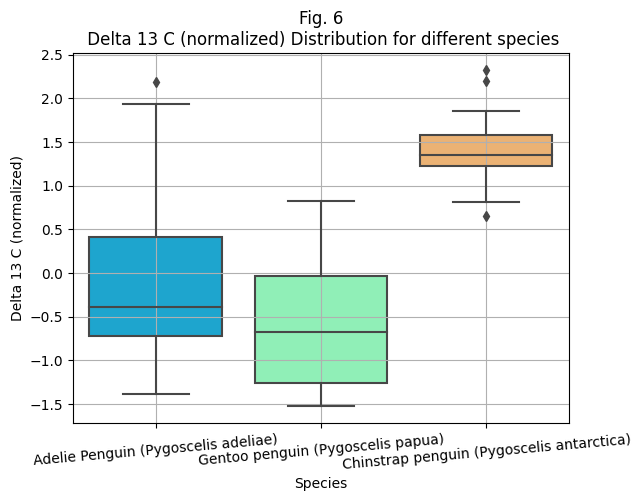

In [35]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                 # Creating a custom figure size
sns.boxplot(x='Species', y='Delta 13 C (o/oo)', palette='rainbow', data=train_csv)        # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                          # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Delta 13 C (normalized)')                                           # Labelling y-axis with a custom label
plt.title(label='Fig. 6\n Delta 13 C (normalized) Distribution for different species') # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- For the class `Adelie Penguine`, the `Delta 13 C (o/oo)` data distribution is skewed. Therefore, to fill the corresponding `NaN`, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Delta 13 C (o/oo)` data distribution is almost symmetrical. Therefore, to fill the corresponding `NaN`, we will use the **mean** of the values having the same class.

In [36]:
value_adelie = df_species_adelie["Delta 13 C (o/oo)"].median()
value_gentoo = df_species_gentoo["Delta 13 C (o/oo)"].mean()

In [37]:
train_csv.loc[(train_csv["Delta 13 C (o/oo)"].isnull()) & (train_csv["Species"] == 'Adelie Penguin (Pygoscelis adeliae)'), ['Delta 13 C (o/oo)']] = value_adelie
train_csv.loc[(train_csv["Delta 13 C (o/oo)"].isnull()) & (train_csv["Species"] == 'Gentoo penguin (Pygoscelis papua)'), ['Delta 13 C (o/oo)']] = value_gentoo

In [38]:
train_csv[train_csv['Delta 13 C (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have filled the missing values of `Delta 13 C (o/oo)` attribute

- Now we have successfully completed the imputation of continuous attributes. 

----

In [39]:
# Visualize the rows that have missing values
train_csv[train_csv.isnull().any(axis=1)]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
26,Torgersen,Yes,-0.362691,1.543138,-0.765778,0.083264,NaN,0.681774,0.711419,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,-1.120027,0.059800,-1.479594,-0.602091,NaN,0.207308,-0.389576,Adelie Penguin (Pygoscelis adeliae)
169,Biscoe,No,0.620042,-1.121538,1.185826,1.080144,NaN,-0.882649,-0.648235,Gentoo penguin (Pygoscelis papua)
197,Torgersen,Yes,-1.787204,0.468996,-0.551633,-0.882463,NaN,0.207308,-0.389576,Adelie Penguin (Pygoscelis adeliae)
206,Biscoe,Yes,0.394645,-1.423538,0.947381,0.581704,NaN,-0.902430,-1.420835,Gentoo penguin (Pygoscelis papua)
212,Torgersen,Yes,-1.120027,-0.042499,-1.051305,-1.100531,NaN,-0.209255,0.563462,Adelie Penguin (Pygoscelis adeliae)
219,Biscoe,Yes,0.088104,-0.758593,1.161526,0.862077,NaN,-1.260520,-0.639426,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,0.622445,-0.774701,-0.711124,NaN,0.207308,-0.389576,Adelie Penguin (Pygoscelis adeliae)


- As we can observe, only `Sex` (categorical) attribute has NaN values. Let's train a **Decision trees** classifier to classify the target attribute 'Sex', given other attributes.
<br />
- Let's prepare the data first.
    - Get the tuples / rows where 'Sex' != 'Nan', and encode all the categorical values (`DT_data`). This would make our training dataset.
    - Split the training dataset into train and test set (80%->train - 20%->test).
- Train a DT classifier using Scikit-Learn library.
- Once the accuracy on the test set is desirable, use the trained decision-tree classifier to predict the value of NaN values of Sex attribute.
- Finally, replace the NaN values in the `train_csv` dataframe with the output given by trained model.

In [40]:
train_csv.head(1)

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,-0.939709,0.00865,-1.479594,-0.477481,MALE,1.581213,0.457687,Adelie Penguin (Pygoscelis adeliae)


In [41]:
# Data preparation
DT_data = train_csv.copy()
DT_data = DT_data.dropna() # dropping the rows having NaN values
DT_X = DT_data[['Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species']] # separate features and target variable
DT_y = DT_data['Sex']
DT_X_encoded = pd.get_dummies(DT_X, columns=['Island', 'Species'])
DT_X_encoded.replace({'Yes': 1, 'No': 0}, inplace=True) # for encoding 'Clutch Completion'
DT_X_encoded.replace({True: 1, False: 0}, inplace=True) # to encode the 'True' to 1 and 'False' to 0
DT_y_encoded = DT_y
DT_y_encoded.replace({'MALE': 0, 'FEMALE': 1}, inplace=True) # for encoding target variable 'Sex'

In [42]:
# After data preparation, this is how the input variables look like
DT_X_encoded.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
0,1,-0.939709,0.00865,-1.479594,-0.477481,1.581213,0.457687,1,0,0,1,0,0


In [43]:
# After data preparation, this is how the target variable looks like
DT_y_encoded.head(1)

0    0
Name: Sex, dtype: int64

In [44]:
# Evaluating how well the default arguments of a decision tree model tends to fit the data distribution that we have

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold
stratkf = StratifiedKFold(n_splits=20, random_state=42, shuffle=True)

# Initialize a list to store the cross-validation scores
crossv_scores = []

# Perform stratified K-fold cross-validation
for train_idx, val_idx in stratkf.split(DT_X_encoded, DT_y_encoded):
    # print("train_idx", train_idx)
    # print("val_idx", val_idx)
    X_train, X_val = DT_X_encoded.iloc[train_idx], DT_X_encoded.iloc[val_idx]
    y_train, y_val = DT_y_encoded.iloc[train_idx], DT_y_encoded.iloc[val_idx]
    # print(f"X_train: {X_train}")
    # print(f"y_train: {y_train}\ny_val: {y_val}")
    # print(f"X_val: {X_val}")
    # print("-----------")

    # Train the model
    classifier.fit(X_train, y_train)
    # Evaluate on validation set
    score = classifier.score(X_val, y_val)
    crossv_scores.append(score)

print("Cross Validation Scores:", crossv_scores)

# Evaluate accuracy of the trained model
print('List of possible accuracies:', crossv_scores)
print('\n')
print('Maximum Accuracy that can be obtained from this model is:', max(crossv_scores)*100, '%')
print('\n')
print('Minimum Accuracy:', min(crossv_scores)*100, '%')
print('\n')
print('Overall Accuracy:', mean(crossv_scores)*100, '%')
print('\n')
print('Standard Deviation is:', stdev(crossv_scores))

Cross Validation Scores: [0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 1.0, 0.9285714285714286, 0.9285714285714286, 0.8461538461538461, 0.8461538461538461, 0.9230769230769231, 0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.7692307692307693, 0.8461538461538461, 0.9230769230769231, 0.7692307692307693, 0.7692307692307693, 0.6923076923076923, 0.7692307692307693, 0.9230769230769231]
List of possible accuracies: [0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 1.0, 0.9285714285714286, 0.9285714285714286, 0.8461538461538461, 0.8461538461538461, 0.9230769230769231, 0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.7692307692307693, 0.8461538461538461, 0.9230769230769231, 0.7692307692307693, 0.7692307692307693, 0.6923076923076923, 0.7692307692307693, 0.9230769230769231]


Maximum Accuracy that can be obtained from this model is: 100.0 %


Minimum Accuracy: 69.23076923076923 %


Overall Accuracy: 86.34615384615385 %


Standard Deviation is: 0

Explanation: blah blah. fits well. More data.
Let's use the same decision tree instance to train on our data and then once the accuracy metrics is satisfied, let;s use this classifier to train on our full training dataset and predict the output of NaN values.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(DT_X_encoded, DT_y_encoded, stratify=DT_y_encoded, test_size=0.2, random_state=42)

# Train Decision Tree Classifer on a stratified split of 80-20.
classifier.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = classifier.predict(X_test)

accuracy_ovo = accuracy_score(y_test, y_pred)
print(f"Accuracy of OvO: {accuracy_ovo}")
print("Performance Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy of OvO: 0.7962962962962963
Performance Report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.83      0.74      0.78        27

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54

Confusion Matrix: 
 [[23  4]
 [ 7 20]]


- From the confusion matrix, we can see, for each class, how many instances are correctly predicted and how many instances of a particular class is predicted as some other class.

In [46]:
# Training on the same model instance without splitting data 
classifier.fit(DT_X_encoded,DT_y_encoded)

DecisionTreeClassifier(random_state=42)

- With the help of trained model, now let's fill in missing values of 'Sex' attribute.

In [47]:
# Data Preprocessing to make the data of the same format that we used to train Decisin Tree i.e., `DT_X_encoded` and `DT_y_encoded`
X_null = train_csv[train_csv.isnull().any(axis=1)]
{'Island_Dream':[0,0,0,0,0,0,0,0]}
{'Species_Chinstrap penguin (Pygoscelis antarctica)': [0,0,0,0,0,0,0,0]}
X_null = X_null[['Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species']] # separate features and target variable
X_encoded_null = pd.get_dummies(X_null, columns=['Island', 'Species'])
X_encoded_null.replace({'Yes': 1, 'No': 0}, inplace=True) # for encoding 'Clutch Completion'
X_encoded_null.replace({False: 0, True: 1}, inplace=True)
X_encoded_null.insert(8, "Island_Dream", [0,0,0,0,0,0,0,0], True)
X_encoded_null.insert(11, "Species_Chinstrap penguin (Pygoscelis antarctica)", [0,0,0,0,0,0,0,0], True)

In [48]:
X_encoded_null.head(1) # match if this format matches `DT_X_encoded`

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
26,1,-0.362691,1.543138,-0.765778,0.083264,0.681774,0.711419,0,0,1,1,0,0


In [49]:
# predict
y_pred = classifier.predict(X_encoded_null)

In [50]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1])

In [51]:
''' 
Let's fill the missing values of 'Sex' attribute in 
`train_csv` dataframe with the predicted values
'''
for pred_idx, ind in enumerate(train_csv[train_csv.isnull().any(axis=1)].index):
    if y_pred[pred_idx] == 0:
        train_csv.at[ind,'Sex']='MALE'
    if y_pred[pred_idx] == 1:
        train_csv.at[ind,'Sex']='FEMALE'
# train_csv.at[82,'Sex']

In [52]:
train_csv.iloc[82]

Island                                           Torgersen
Clutch Completion                                      Yes
Culmen Length (mm)                               -1.120027
Culmen Depth (mm)                                   0.0598
Flipper Length (mm)                              -1.479594
Body Mass (g)                                    -0.602091
Sex                                                 FEMALE
Delta 15 N (o/oo)                                 0.207308
Delta 13 C (o/oo)                                -0.389576
Species                Adelie Penguin (Pygoscelis adeliae)
Name: 82, dtype: object

In [53]:
train_csv[train_csv.isnull().any(axis=1)]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- All the NaN values have been imputed successfully.

----

### **3. SVM: One vs All**

- Dataset preparation for One vs All
    - We will have three datasets for each of the three binary classification problems. For each binary classification problem one of the three classes will be positive and rest will be negative.

In [54]:
# Prepare data for binary classification

data = train_csv[['Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']] # separate features and target variable
ova_encoded = pd.get_dummies(data, columns=['Island'])
ova_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)
ova_encoded.replace({'FEMALE': 1, 'MALE': 0}, inplace=True)
ova_encoded.replace({True: 1, False: 0}, inplace=True)

X_train_ova, X_test_ova, y_train_ova, y_test_ova = train_test_split(ova_encoded, train_csv['Species'], stratify=train_csv['Species'], test_size=0.2, random_state=42)
train_ova = X_train_ova.copy()
train_ova.insert(11, "Species", y_train_ova, True)

# we will use the full data for training once we have a model instance with satisfactory validation performance.
full_data = ova_encoded.copy()
full_data.insert(11, "Species", train_csv['Species'], True)

In [55]:
full_data.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species
0,1,-0.939709,0.00865,-1.479594,-0.477481,0,1.581213,0.457687,1,0,0,Adelie Penguin (Pygoscelis adeliae)


In [56]:
train_ova.head(1) # Visualize how the overall dataset looks like
# From this dataset, we will create three datasets for each of the three binary classification problems 

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species
170,1,-0.975773,2.054633,-0.694396,-0.477481,0,0.207308,-0.389576,0,0,1,Adelie Penguin (Pygoscelis adeliae)


In [57]:
X_train_ova.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
170,1,-0.975773,2.054633,-0.694396,-0.477481,0,0.207308,-0.389576,0,0,1


In [58]:
X_test_ova.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
138,1,-1.210186,-0.195948,-0.623015,-1.47436,1,0.565629,-0.227755,0,1,0


In [59]:
y_train_ova.head(1)

170    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [60]:
y_test_ova.head(1)

138    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

- We have three binary class problems.</br>
    **Binary Class Problem 1:** `Adelie vs [Chinstrap,Gentoo]` </br>
    **Binary Class Problem 2:** `Chinstrap vs [Adelie,Gentoo]` </br>
    **Binary Class Problem 3:** `Gentoo vs [Chinstrap,Adelie]` </br>

- This approach requires that each model predicts a class membership probability or a probability-like score. The argmax of these scores (class index with the largest score) is then used to predict a class.

- Train Linear SVM with default parameters - *C: 1.0* and *gamma: scale*
    - C and gamma parameters control the tradeoff between the model's ability to fit the training data and its generalization performance. There are different ways to tweak the parameters. One way is to use *Grid Search* to exhaustively search over a range of values for C and gamma. <br />

    - C: The regularization parameter C controls the trade-off between maximizing the margin between the support vectors and correctly classifying the training examples. A large value of C will result in a narrow margin, potentially leading to overfitting, while a small value of C will result in a wide margin, potentially leading to underfitting. <br />
    
    - gamma: The gamma parameter controls the kernel width of the SVM, which affects the smoothness of the decision boundary. A smaller value of gamma can lead to underfitting, whereas a large value of gamma can lead to overfitting. <br />
    
    - For a linear SVM, the gamma parameter is not used, as the linear kernel does not have any gamma parameter to tune.

In [61]:
''' 
Step 1: Prepare three datasets for three binary classification problems.
Step 2: Train three SVM classifiers on each of the three datasets.
''' 

class_species = train_csv['Species'].unique() # Get unique classes
# print("class_species:", classes)

svm_classifiers_ova = {} # Initialize a dictionary to store classifiers for each of the three binary class problems

# Create one-vs-rest classifiers
for class_ in class_species:
    # print("class:", class_species)

    # Prepare data for binary classification
    binary_data = train_ova.copy()
    binary_data['Species'] = (binary_data['Species'] == class_).astype(int)  # 1 if adelie, else 0
    # print(binary_data)
    X_binary = binary_data[['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']] # it will be of the same format as 'X_train_ova'
    y_binary = binary_data['Species']
    
    # Train a SVM classifier
    svm_classifier = SVC(kernel='linear', C=0.006, random_state=42)
    svm_classifier.fit(X_binary, y_binary)
    
    # Store the classifier
    svm_classifiers_ova[class_] = svm_classifier
print("svm_classifiers_ova", svm_classifiers_ova)

# Now we have a dictionary 'svm_classifiers_ova' which contains the trained OvR classifiers.
# We will use these classifiers for predictions in thr next step.

svm_classifiers_ova {'Adelie Penguin (Pygoscelis adeliae)': SVC(C=0.006, kernel='linear', random_state=42), 'Gentoo penguin (Pygoscelis papua)': SVC(C=0.006, kernel='linear', random_state=42), 'Chinstrap penguin (Pygoscelis antarctica)': SVC(C=0.006, kernel='linear', random_state=42)}


- Now we have a dictionary 'svm_classifiers_ova' which contains three trained OvA binary classifiers classifiers.

In [62]:
X_binary.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
170,1,-0.975773,2.054633,-0.694396,-0.477481,0,0.207308,-0.389576,0,0,1


In [63]:
''' 
Step 3: Making predictions on Test set via trained binary classifiers
'''

per_class_pred_ova = {} # Initialize a dictionary to store prediction class

print("Total rows in Test data for which predictions are needed: ", len(y_test_ova))
for class_, svm_classifier in svm_classifiers_ova.items():
    # test_df = X_test_ova.copy()
    # X_test = test_df[['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']]
    # Predict using the trained SVM classifier
    y_pred = svm_classifier.predict(X_test_ova)
    print("\n")
    print(f"For binary classifier with class - {class_}, \nthe predicted output for each input tuple is: {y_pred}")
    per_class_pred_ova[class_] = y_pred

print("\n")
print("The final dictionary comprising the predicitions on input tuples from each of the three binary classifiers look like:")
per_class_pred_ova

Total rows in Test data for which predictions are needed:  55


For binary classifier with class - Adelie Penguin (Pygoscelis adeliae), 
the predicted output for each input tuple is: [1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0]


For binary classifier with class - Gentoo penguin (Pygoscelis papua), 
the predicted output for each input tuple is: [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1]


For binary classifier with class - Chinstrap penguin (Pygoscelis antarctica), 
the predicted output for each input tuple is: [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0]


The final dictionary comprising the predicitions on input tuples from each of the three binary classifiers look like:


{'Adelie Penguin (Pygoscelis adeliae)': array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]),
 'Gentoo penguin (Pygoscelis papua)': array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 'Chinstrap penguin (Pygoscelis antarctica)': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])}

In [64]:
''' 
Step 4: Combine the predictions to get multi-class predictions 
'''
y_pred_multiclass_ova = pd.DataFrame(per_class_pred_ova).idxmax(axis=1)

In [65]:
y_pred_multiclass_ova.head(10) 

0          Adelie Penguin (Pygoscelis adeliae)
1          Adelie Penguin (Pygoscelis adeliae)
2            Gentoo penguin (Pygoscelis papua)
3          Adelie Penguin (Pygoscelis adeliae)
4          Adelie Penguin (Pygoscelis adeliae)
5          Adelie Penguin (Pygoscelis adeliae)
6          Adelie Penguin (Pygoscelis adeliae)
7            Gentoo penguin (Pygoscelis papua)
8          Adelie Penguin (Pygoscelis adeliae)
9    Chinstrap penguin (Pygoscelis antarctica)
dtype: object

In [66]:
''' 
Step 5: Evaluate the accuracy of predictions 
'''
accuracy_ova = accuracy_score(y_test_ova, y_pred_multiclass_ova)
print(f"Accuracy of OvA: {accuracy_ova}")
print("Performance Report: \n", classification_report(y_test_ova, y_pred_multiclass_ova))
print("Confusion Matrix: \n", confusion_matrix(y_test_ova, y_pred_multiclass_ova))

Accuracy of OvA: 0.9454545454545454
Performance Report: 
                                            precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.89      1.00      0.94        24
Chinstrap penguin (Pygoscelis antarctica)       1.00      0.75      0.86        12
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        19

                                 accuracy                           0.95        55
                                macro avg       0.96      0.92      0.93        55
                             weighted avg       0.95      0.95      0.94        55

Confusion Matrix: 
 [[24  0  0]
 [ 3  9  0]
 [ 0  0 19]]


- We observe that with the default value of C, the accuracy was 100%, which could be a severe case of overfitting.
- To generalize the model further, we changed the C to a lower value of C=0.006, that resulted in an accuracy value of 94.5%.
- Also, from the confusion matrix, we can see, for each class, how many instances are correctly predicted and how many instances of a particular class is predicted as some other class.

- Now, let's train the same SVM classifier on the whole data without splitting so that we can use it for the predictions on entirely new data from `penguins_test.csv`

In [67]:
''' 
Finally, training our SVM on the whole data and save the model weights
to be called later when required predictions on `penguins_test.csv`
''' 

class_species = train_csv['Species'].unique() # Get unique classes
# print("class_species:", classes)

# svm_classifiers_ova = {} # Initialize a dictionary to store classifiers for each of the three binary class problems

# Create one-vs-rest classifiers
for class_ in class_species:
    # print("class:", class_species)

    # Prepare data for binary classification
    binary_data = full_data.copy()
    binary_data['Species'] = (binary_data['Species'] == class_).astype(int)  # 1 if adelie, else 0
    # print(binary_data)
    X_binary = binary_data[['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']] # it will be of the same format as 'X_train_ova'
    y_binary = binary_data['Species']
    
    # Train a SVM classifier
    svm_classifier = SVC(kernel='linear', C=0.006, random_state=42)
    svm_classifier.fit(X_binary, y_binary)
    
    # Store the classifier
    # svm_classifiers_ova[class_] = svm_classifier
    # print(class_)
    
    # save the model to disk
    if (class_ == 'Adelie Penguin (Pygoscelis adeliae)'):
        filename = 'ova_svm_final_adelie.sav'
        pickle.dump(svm_classifier, open(filename, 'wb'))
    elif (class_ == 'Gentoo penguin (Pygoscelis papua)'):
        filename = 'ova_svm_final_gentoo.sav'
        pickle.dump(svm_classifier, open(filename, 'wb'))
    elif (class_ == 'Chinstrap penguin (Pygoscelis antarctica)'):
        filename = 'ova_svm_final_chinstrap.sav'
        pickle.dump(svm_classifier, open(filename, 'wb'))
    
# print("svm_classifiers_ova", svm_classifiers_ova)

----

### **4. SVM: One vs One**

- Dataset preparation for One vs One
    - We will have three datasets, where for each we will have a binary data between two of the the three classes.
    - For first dataset, we will keep only the rows with 'Adelie' and 'Chinstrap', where 'Adelie'=1 and 'Chinstrap'=0
    - For second dataset, we will keep only the rows with 'Adelie' and 'Gentoo', where 'Adelie'=1 and 'Gentoo'=0
    - For third dataset, we will keep only the rows with 'Chinstrap' and 'Gentoo', where 'Chinstrap'=1 and 'Gentoo'=0

In [68]:
# Prepare data for binary classification

data = train_csv[['Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']] # separate features and target variable
ovo_encoded = pd.get_dummies(data, columns=['Island'])
ovo_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)
ovo_encoded.replace({'FEMALE': 1, 'MALE': 0}, inplace=True)
ovo_encoded.replace({True: 1, False: 0}, inplace=True)

# Split into train and test set
X_train_ovo, X_test_ovo, y_train_ovo, y_test_ovo = train_test_split(ovo_encoded, train_csv['Species'], stratify=train_csv['Species'], test_size=0.2, random_state=42)

train_ovo = X_train_ovo.copy()
train_ovo.insert(11, "Species", y_train_ovo, True)

In [69]:
train_ovo.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species
170,1,-0.975773,2.054633,-0.694396,-0.477481,0,0.207308,-0.389576,0,0,1,Adelie Penguin (Pygoscelis adeliae)


In [70]:
X_train_ovo.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
170,1,-0.975773,2.054633,-0.694396,-0.477481,0,0.207308,-0.389576,0,0,1


In [71]:
y_train_ovo.head(1)

170    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [72]:
X_test_ovo.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
138,1,-1.210186,-0.195948,-0.623015,-1.47436,1,0.565629,-0.227755,0,1,0


In [73]:
y_test_ovo.head(1)

138    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

- We have three binary class problems.</br>
    **Binary Class Problem 1:** `Adelie vs Chinstrap` </br>
    **Binary Class Problem 2:** `Adelie vs Gentoo` </br>
    **Binary Class Problem 3:** `Chinstrap vs Gentoo` </br>

- Each binary classification model may predict one class label and the model with the most predictions or votes is predicted by the one-vs-one strategy. </br>

In [74]:
''' 
Step 1: Prepare three datasets for one-vs-one classifiers.
Step 2: Train One-vs-One classifiers using SVM.
''' 

class_species = train_csv['Species'].unique() # Get unique classes
# print("class_species:", classes)

svm_classifiers_ovo = {} # Initialize a dictionary to store classifiers for each of the three binary class problems

# Create one-vs-one classifiers
for class_1, class_2 in combinations(class_species, 2):
    
    # Prepare data for binary classification
    # print(f"For classes: {class_1} and {class_2}")
    binary_data = train_ovo.copy()
    binary_data = binary_data[(binary_data['Species'] == class_1) | (binary_data['Species'] == class_2)]
    # print("binary_data:\n",binary_data)
    
    X_binary = binary_data[['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']] # it will be of the same format as 'X_train_ovo'
    y_binary = (binary_data['Species'] == class_1).astype(int)  # 1 if class_1, else 0
    # print("X_binary:\n",X_binary)
    # print("y_binary:\n",y_binary)
    
    # Train a SVM classifier
    svm_classifier = SVC(kernel='linear', C=0.005, random_state=42) # values tried = 0.1, 0.01, 0.001, 0.008, 0.006, 0.005
    svm_classifier.fit(X_binary, y_binary)
    
    # Store the classifier
    svm_classifiers_ovo[(class_1, class_2)] = svm_classifier
print("svm_classifiers_ovo:\n", svm_classifiers_ovo)

svm_classifiers_ovo:
 {('Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)'): SVC(C=0.005, kernel='linear', random_state=42), ('Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)'): SVC(C=0.005, kernel='linear', random_state=42), ('Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)'): SVC(C=0.005, kernel='linear', random_state=42)}


In [75]:
'''
Step 3: Test the One-vs-One classifier on the Test set
'''

# Initialize an empty list to store predictions
predictions_ovo = []

print("Total rows in Test data for which predictions are needed: ", len(y_test_ovo))

# Iterate through each data point in the test set
for index, row in X_test_ovo.iterrows():
    # print("row:\n", row)
    class_votes = {} # Initialize a dictionary to store class votes
    
    # Use each OvO classifier to vote for a class
    for (class_1, class_2), svm_classifier in svm_classifiers_ovo.items():
        y_pred = svm_classifier.predict([row])[0]
        # print(f"For classes {class_1} & {class_2}")
        # print("y_pred: ", y_pred)
        if y_pred == 1:
            class_votes[class_1] = class_votes.get(class_1, 0) + 1
        else:
            class_votes[class_2] = class_votes.get(class_2, 0) + 1
        # print("class_votes: ", class_votes)
    
    # Determine the predicted class with the most votes
    predicted_class = max(class_votes, key=class_votes.get)
    # print("predicted_class of the row: ", predicted_class)

    predictions_ovo.append(predicted_class)
print("predictions for all Test rows: ", predictions_ovo)

Total rows in Test data for which predictions are needed:  55
predictions for all Test rows:  ['Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)', 'Gentoo penguin (Pygoscelis papua)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)', 'Chins

In [76]:
'''
Step 4: Evaluate accuracy of predictions
'''
accuracy_ovo = accuracy_score(y_test_ovo, predictions_ovo)
print(f"Accuracy of OvO: {accuracy_ovo}")
print("Performance Report: \n", classification_report(y_test_ovo, predictions_ovo))
print("Confusion Matrix: \n", confusion_matrix(y_test_ovo, predictions_ovo))

Accuracy of OvO: 0.9636363636363636
Performance Report: 
                                            precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.92      1.00      0.96        24
Chinstrap penguin (Pygoscelis antarctica)       1.00      0.83      0.91        12
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        19

                                 accuracy                           0.96        55
                                macro avg       0.97      0.94      0.96        55
                             weighted avg       0.97      0.96      0.96        55

Confusion Matrix: 
 [[24  0  0]
 [ 2 10  0]
 [ 0  0 19]]


- We observe that with the default value of C, the accuracy was 100%, which could be a severe case of overfitting.
- To generalize the model further, we changed the C to a lower value of C=0.005, that resulted in an accuracy value of 96.3%.
- Also, from the confusion matrix, we can see, for each class, how many instances are correctly predicted and how many instances of a particular class is predicted as some other class.

- Now, let's train the same SVM classifier on the whole data without splitting so that we can use it for the predictions on entirely new data from `penguins_test.csv`

In [77]:
''' 
Finally, training our SVM on the whole data and save the model weights
to be called later when required predictions on `penguins_test.csv`
''' 

class_species = train_csv['Species'].unique() # Get unique classes
# print("class_species:", classes)

# svm_classifiers_ovo = {} # Initialize a dictionary to store classifiers for each of the three binary class problems

# Create one-vs-one classifiers
for class_1, class_2 in combinations(class_species, 2):
    
    # Prepare data for binary classification
    # print(f"For classes: {class_1} and {class_2}")
    binary_data = full_data.copy()
    binary_data = binary_data[(binary_data['Species'] == class_1) | (binary_data['Species'] == class_2)]
    # print("binary_data:\n",binary_data)
    
    X_binary = binary_data[['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']] # it will be of the same format as 'X_train_ovo'
    y_binary = (binary_data['Species'] == class_1).astype(int)  # 1 if class_1, else 0
    # print("X_binary:\n",X_binary)
    # print("y_binary:\n",y_binary)
    
    # Train a SVM classifier
    svm_classifier = SVC(kernel='linear', C=0.005, random_state=42) # values tried = 0.1, 0.01, 0.001, 0.008, 0.006, 0.005
    svm_classifier.fit(X_binary, y_binary)

    print(class_1, class_2)

    # save the model to disk
    if (class_1 == 'Adelie Penguin (Pygoscelis adeliae)' and class_2 == 'Gentoo penguin (Pygoscelis papua)'):
        filename = 'ovo_svm_final_adelie_gentoo.sav'
        pickle.dump(svm_classifier, open(filename, 'wb'))
    elif (class_1 == 'Adelie Penguin (Pygoscelis adeliae)' and class_2 == 'Chinstrap penguin (Pygoscelis antarctica)'):
        filename = 'ovo_svm_final_adelie_chinstrap.sav'
        pickle.dump(svm_classifier, open(filename, 'wb'))
    elif (class_1 == 'Gentoo penguin (Pygoscelis papua)' and class_2 == 'Chinstrap penguin (Pygoscelis antarctica)'):
        filename = 'ovo_svm_final_gentoo_chinstrap.sav'
        pickle.dump(svm_classifier, open(filename, 'wb'))
    
    # Store the classifier in a dictionary
    # svm_classifiers_ovo[(class_1, class_2)] = svm_classifier
# print("svm_classifiers_ovo:\n", svm_classifiers_ovo)

Adelie Penguin (Pygoscelis adeliae) Gentoo penguin (Pygoscelis papua)
Adelie Penguin (Pygoscelis adeliae) Chinstrap penguin (Pygoscelis antarctica)
Gentoo penguin (Pygoscelis papua) Chinstrap penguin (Pygoscelis antarctica)


----

----